
## Lecture 1: Introduction to Machine Learning



Welcome to Applied Machine Learning---an open online version of CS 5785, a course taught at Cornell University and Cornell Tech.

In this course, you will learn what machine learning is, what are the most important techniques in machine learning, and how to apply them to solve real world problems.

Our goal for this first lecture will be provide an overview of the course, and provide some intuitions for what machine learning is at a high level. In the final part of the lecture, we will cover important logistical details that you should know when taking the course.

# Part 1: What is Machine Learning?

Below are three snippets from the press that illustrate three ways in machine learning (ML) and the related field of artifical intelligence (AI) have had a significant impact on the world.

<table><tr>
    <td><center><img width=90% src="https://kuleshov-group.github.io/aml-resources/img/alphago.jpeg"/></center></td>
    <td><center><img src="https://kuleshov-group.github.io/aml-resources/img/obama2.jpg"/></center></td>    
    <td><center><img width=80% src="https://raw.githubusercontent.com/kuleshov-group/aml-resources/d19732ee549b5c48ac215016c218ecad6a9107e3/img/chatgpt.png"></center></td>    
</tr></table>    

* __Science__: The left image displays the cover of the journal Nature. It illustrates that ML is fundamentally a scientific field that has seen rapid advances in recent years. This particular image illustrates a breakthrough from 2016, in which an ML-based system called [AlphaGo](https://www.nature.com/articles/nature16961) became the world champion at the game of Go---a feat that was previously thought to be decades away. 
* __Society__: In the middle, we see a [interview](https://www.wired.com/2016/10/president-obama-mit-joi-ito-interview/) by Wired magazine with Barrack Obama on ML and AI. Obama discusses the impact of AI on topics like unemployment and inequality. It is meant to illustrate that ML is not only a scientific endeavor, but also a field with profound impact on society and policy.
* __Applications__: Our third snippet features [ChatGPT](https://chat.openai.com/), and is meant to show that AI not only influences our thinking in science and policy, but enables the creation of useful tools. Assistants like ChatGPT will have an increasingly large impact on the automation of various aspects of how we work and go about our daily lives.

## 1.1. Examples of ML in Everyday Life

While ChatGPT is a particularly promiment example of a system powered by machine learning, there exist many other ways in which machine learning is deployed around us. In fact, you may have interacted with ML-based systems today without even realizing it. 

Let's look at a few examples and gradually work our way towards a precise definition of machine learning.

#### Search Engines

If you used a search engine to find these course notes, you almost certainly relied on ML algorithms to find the information you were looking for.

<center><img src="https://kuleshov-group.github.io/aml-resources/img/google.png"/></center>

When you type your query into a search engine, it uses machine learning to parse the query and determine its intent. It then uses another set of ML algorithms to find the information relevant to your query before outputting that information as part of the search results.

#### Personal Assitants

If you own a smartphone that features a personal assistant like Apple Siri or Google Assistant, you are also using a system based on machine learning.

<table><tr>
    <td><center><img src="https://kuleshov-group.github.io/aml-resources/img/siri.png"/></center></td>
    <td><center><img src="https://kuleshov-group.github.io/aml-resources/img/google_assistant.png"/></center></td>
</tr></table>    

The assistant software uses speech recognition algorithms powered by ML to transform the sound of your voice into a sequence of characters or words. It then uses a different set of ML algorithms to infer the intent of your command as well as to perform the processing needed to compute the correct response (in the above example, finding images from Thailand).

#### Spam or Fraud Detection

If you use an email service like GMail, you are relying on machine learning to keep your inbox clean and spam-free. Most email software uses classification algorithms to identify spam and non-spam email.

<br>
<center><img src="https://kuleshov-group.github.io/aml-resources/img/spam.png"/></center>

More generally, when you use services from the financial sector (e.g., a credit card or even a regular bank account), you rely on ML to flag potentially fradulent transaction. Machine learning is one reason why your account is safe from fraud!

#### Autonomous Vehicles

Our last example is still a bit further out in the future than all the others, but it also represents a particularly impactful application of machine learning. In this example, autonomous vehicles rely on ML to detect objects on the road, read signs, and to plan their movements.

<center><img width="80%" src="https://kuleshov-group.github.io/aml-resources/img/waymo.jpg"/></center>

When widely deployed, autonomous vehicles have the potential to transform transportation by reducing its cost and giving access to personal mobility to persons who would otherwise not be able to operate a vehicle (e.g., the blind).

## 1.2. A Definition of Machine Learning

We have seen a few examples of what machine learning is. Let's now try to define it formally. We will start with the following definition, first proposed by the Arthur Samuel in 1959.

> Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed.

This definition is widely used across numerous courses and textbooks. However, at first it might be hard to wrap your around it. What does Samuel mean when he uses words like "learn" and "explicitly programmed"? Let's look at one final example to clarify this.

### Self Driving Cars: A Rules-Based System

We return to our previous example: autonomous vehicles. A self-driving car uses dozens of components based on machine learning. One such component is object detection: given input from the car's sensors, we want to automatically identify cars, cyclists, pedestrians, and other objects on the road.
<br>
<center><img width=80% src="https://kuleshov-group.github.io/aml-resources/img/tesla.jpg"/></center>

How might we build an object detection systems for a car? The classical programming approach is to write down a set of rules.

<left><img width=50% src="https://kuleshov-group.github.io/aml-resources/img/tesla_zoom.jpg"/></left>

<!-- <table style="border: 1px"><tr>
    <td><left>One way to build a detection system is to write down rules.</left></td>
    <td><img src="img/tesla_zoom.jpg"/></td>
</tr></table> -->

For example, if we see an object, and it has two wheels, then it is likely to be a bicycle. We can incorporate this logic as one of the rules implemented by our system.

However, in the above image, some cars are seen by the camera from the back. In such cases, cars also appear to have two wheels! In a rules-based system, we need to write an exception to the earlier rule to handle the cases in which the object is seen from the back. Below is pseudocode that tries to implement this idea.

In [2]:
# pseudocode example for a rule-based classification system
object = camera.get_object() # assumes we have a "camera" API
if object.has_wheels(): # does the object have wheels?
    if len(object.wheels) == 4: return "Car" # four wheels => car    
    elif len(object.wheels) == 2:,
        if object.seen_from_back():
            return "Car" # viewed from back, car has 2 wheels
        else:
            return "Bicycle" # normally, 2 wheels => bicycle
return "Unknown" # no wheels? we don't know what it is

You can probably start to see that this approach suffers from significant limitations. Even in this very simple example, we have run into edge cases that simple rules cannot handle. Imagine now how many edge cases we would encounter if we tried to build a rules-based system for all the possible images in a self-driving car!

Clearly, it is almost impossible for a human to specify all the edge cases that might arise in a complex environment. The rules-based solution simply does not scale.

### Self Driving Cars: An ML-Based System

Machine learning is an alternative approach to building software systems that instead tries to *teach* a computer
how to perform tasks by providing it examples of desired behavior.

In this example, we might collect a large dataset of labeled objects on the road. We then feed this dataset to a short meta-algorthim through which the computer automatically learns what a cyclist or a car look like. It then uses this knowledge to detect objects on the road.

<center><img src="https://kuleshov-group.github.io/aml-resources/img/tesla_data.png"/></center>

This approach is much more scalable: we no longer need to directly specify the correct behavior in every edge case---the computer learns the desired behavior from data. This approach turns out to one of the only ways of building a complex algorithm like an object detector.

#### Revisiting Our Definition of ML

This last xample should now help us to better understand the definition proposed by Arthur Samuel.

<!-- > Machine learning is a field of study that gives computers the ability to learn without being explicitly programmed. (Arthur Samuel, 1959.) -->

Machine learning is a way of building software systems without explicitly programming their behavior: instead computers can learn to perform the desired behavior on their own from a small number of examples. This principle can be applied to countless domains:
medical diagnosis, factory automation, machine translation, and many others.

## 1.3. Why Machine Learning?

We end this part of the lecture with some final thoughts on the reasons for why studying machine learning is useful and interesting.

* First, machine learning is among the only ways of building software for certain important real-world applications. Object detection is one example, but machine learning also produces the best performing systems for a wide range of tasks such as machine translation, speech recognition, image classification, and many others.

* Learning is also widely regarded as a key approach towards building general-purpose artificial intelligence systems. By developing learning algorithms, we create techniques that may one day enable us to create true artificial intelligence.

* Finally, the science and engineering of machine learning can offer insights into human intelligence. By studying artificial systems, we can also hope to make discoveries about the human mind.


# Part 2: Three Approaches to Machine Learning

Next, we will look at slighly more specific examples of machine learning methods. It is common to define three broad subfields of machine learning which implement three different approaches for creating learning algorithms.

## 2.1. Supervised Learning

The most common type of machine learning is supervised learning. Most of our previous examples have been instances of this appraoch.

<center><img width=70% src="https://kuleshov-group.github.io/aml-resources/img/tesla_data.png"/></center>

Supervised learning implements the following strategy:
1. First, we collect a dataset of labeled training examples.
2. We teach a model to output accurate predictions on this dataset.
3. When the model sees new, similar data, it will also be accurate.

In addition to many examples introduced earlier, supervised learning is widely used for tasks such as:
* Classifying medical images. Given a large datasets of images of malignant and benign tumors, we seek to develop a system that can identify tumors in new images.
* Translating between pairs of languages. Here, supervision comes in the form of pairs of sentences that have the same meaning in two different languages.
* Detecting objects in a self-driving car.

## 2.2 Unsupervised Learning

In unsupervised learning, we start with a dataset *without* any labels. Unsupervised learning seeks to discover interesting and useful patterns in this data, such as:
* Clusters of related datapoints. For example, we might want to discover groups of similar customers from the logs of an e-commerce website.
* Outliers, i.e., particularly unusual or interesting datapoints. For example, suspicious transacations at an online bank.
* Signal that has been mixed with noise. Denoising an image corrupted with white noise.

### An Example of Unsupervised Learning

Let's look more closely at one common real-world application of unsupervised learning.
Consider the following text, which contains at least four distinct topics.

<center><img width=60% src="https://kuleshov-group.github.io/aml-resources/img/lda1.png"/></center>

The blue words pertain mostly to computers. The red words pertain to biology, while the yellow words have to do with genetics.

It would be useful to be able to detect these topics automatically. However, in practice we rarely text labeled with per-word topics.

<center><img width=80% src="https://kuleshov-group.github.io/aml-resources/img/lda3.png"/></center>

Unsupervised topic models can automatically discover clusters of related words in the data (these are the "topics") and assign a topic label to each word, as well as a set of topic proportions to each document.

<center><img width=80% src="https://kuleshov-group.github.io/aml-resources/img/lda2.png"/></center>

This kind of analysis can be useful for automating analysis in the social sciences, as well as for accelerating the analysis of financial documents. One of the most well-known topic modeling methods is called latent Dirichlet allocation.

### Other Applications of Unsupervised Learning

Unsupervised learning has numerous other applications:
* Recommendation systems. For example, the recommendation engine at Netflix is based on the unsupervised discovery of common viewing patterns across users.
* Anomaly detection. The field of predictive maintenantce seeks to identify factory components that are likely to fail soon.
* Signal denoising: extracting human speech from a noisy recording.

## 2.3 Reinforcement Learning

In reinforcement learning, an agent is interacting with the world over time. We teach it good behavior by providing it with rewards.

<center><img src="https://kuleshov-group.github.io/aml-resources/img/rl.png"/></center>

<sub><sup>Image by Lily Weng</sup></sub>

For example, we may deploy a robot in the real world. If the robot executes bad actions (e.g., it breaks something), we provide it negative reward. If it performs a useful action (correctly picking up an time), we provide it positive reward. The learning algorithm over time learns to perform actions that lead to high reward.

At first, reinforcement learning may appear to be similar to supervised learning. However, the key difference is that in reinforcement learning, an agent must explore the environment and try things on its own to collect rewards; in supervised learning, all the supervision is provided to the agent upfront.

### Applications of Reinforcement Learning

Applications of reinforcement learning include:
* Creating __agents__ that play games such as Chess or Go.
* __Indutrial control__: automatically operating cooling systems in datacenters to use energy more efficiently.
* __Generative design__ of new drug compounds.

## 2.4 Artificial Intelligence and Deep Learning

Lastly, machine learning is often discussed in the context of two other related fields : artificial intelligence and deep learning. Their relationship is best described by the Venn diagrom below.
<center><img width="50%" src="https://kuleshov-group.github.io/aml-resources/img/ai_ml_dl.png"/></center>

<sub><sup>Image [source](https://towardsdatascience.com/understanding-the-difference-between-ai-ml-and-dl-cceb63252a6c).</sup></sub>

* The field of AI is concerned with building machines that exhibit human-level intelligence. ML enables machines to learn from experience, which is a useful approach within AI.
* Deep learning is a field that studies learning algorithms called neural networks that are loosely inspired by the brain. It is a subfield of machine learning.


# Part 3: Logistics and Course Information.

We conclude the lecture with the logistical aspects of the course.

## 3.1 What Is the Course About?

This course studies the foundations and applications of machine learning.
* __Algorithms__: We cover a *broad* set of ML algorithms: linear models, boosted decision trees, neural networks, SVMs, etc.
* __Foundations__: We explain why they work using *math*. We cover maximum likelihood, generalization, regularization, etc.
* __Implementation__: We teach how to *implement* algorithms from scratch using `numpy` or `sklearn`

We also cover many practical aspects of applying machine learning.

Some of the most important sets of topics we will cover include:
* __Basics of Supervised Learning__: Regression, classification, overfitting, regularization, generative vs. discriminative models
* __Unsupervised Learning__: Clustering, dimensionality reduction, etc.
* __Advanced Supervised Learning__: Support vector machines, kernel methods, decision trees, boosting, deep learning.
* __Applying ML__: Overfitting, error analyis, learning curves, etc.

The format of this course will be that of the "reverse classroom". Pre-recorded lecture videos will be made available online ahead of time. You should watch them ahead of each weekly lecture. In-class discussions will focus on answering student questions, going over homework problems, doing tutorials.

## 3.2 Prerequisites: Is This Course For You?

The main requirements for this course are:
* __Programming__: At least 1 year of experience, preferably in Python.
* __Linear Algebra__: College-level familiarity with matrix operations, eigenvectors, the SVD, vector and matrix norms, etc.
* __Probability__. College-level understanding of probability distributions, random variables, Bayes' rule, etc.

This course does not assume any prior ML experience.

## 3.3 Course Materials

The slides for each lecture are available online on [Github](https://github.com/kuleshov/cornell-cs5785-2023-applied-ml).

Detailed lecture notes are available [online](https://kuleshov-group.github.io/aml-book/intro.html) as an HTML website. 

Lecture videos are available on [Youtube](https://www.youtube.com/playlist?list=PL2UML_KCiC0UlY7iCQDSiGDMovaupqc83). These videos were originally recorded for the 2020 edition of the course.

### Executable Course Materials

The core materials for this course (including the slides!) are created using Jupyter notebooks.
* We are going to embed an execute code directly in the slides and use that to demonstrate algorithms.
* These slides can be downloaded locally and all the code can be reproduced.

Below is an example, where use some standard Python ML libraries to solve a digit classifcation task.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neural_network
plt.rcParams['figure.figsize'] = [12, 4]

We can use these libraries to load a simple datasets of handwritten digits.

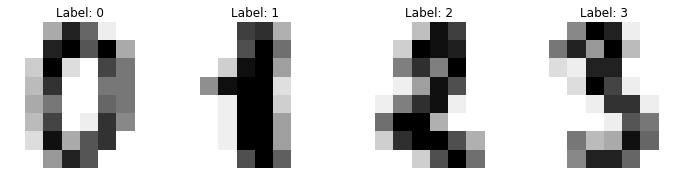

In [7]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
# load the digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images.
_, axes = plt.subplots(1, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)

We can now load and train this algorithm inside the slides.

In [30]:
np.random.seed(0)
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data = digits.images.reshape((len(digits.images), -1))

# create a small neural network classifier
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(alpha=1e-3)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

We can now visualize the results.

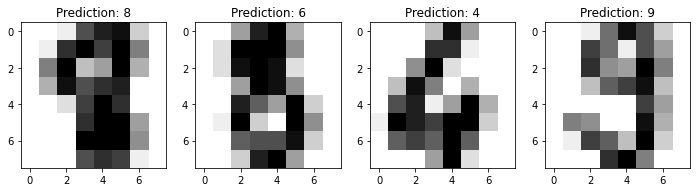

In [31]:
_, axes = plt.subplots(1, 4)
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes, images_and_predictions[:4]):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

### Again, Welcome to Applied Machine Learning!
<left><img width=25% src="https://kuleshov-group.github.io/aml-resources/img/cornell_tech2.svg"></left>